In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

In [2]:
img = cv2.imread("/home/renyan/ossdata/gf-yunnan/IMG_0034.JPG")

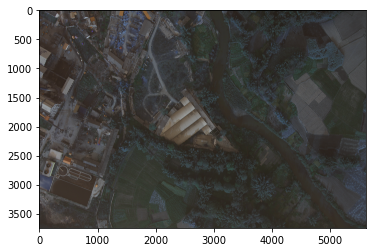

In [3]:
plt.imshow(img)

In [4]:
img.shape

(3744, 5616, 3)

In [5]:
img1=img
#图像格式转换
# img10=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img10 = img1
 
#计算JD
I=2003
J=2
K=20
JD=K-32075+1461*(I+4800+ (J-14)/12)/4+367*(J-2-(J-14)/12*12)/12-3*((I+4900+(J-14)/12)/100)/4
#设置ESUNI值
ESUNI71=196.9
#计算日地距离D
D=1-0.01674*math.cos((0.9856*(JD-4)*math.pi/180))
#计算太阳天顶角
cos=math.cos(math.radians(90-41.3509605))
 
inter=(math.pi*D*D)/(ESUNI71*cos*cos)
 
#大气校正参数设置
Lmini=-6.2
Lmax=293.7
Qcal=1
Qmax=255
LIMIN=Lmini+(Qcal*(Lmax-Lmini)/Qmax)
LI=(0.01*ESUNI71*cos*cos)/(math.pi*D*D)
Lhazel=LIMIN-LI
 
 
def copy(img,new1):
    new1= np.zeros(img.shape,dtype='uint16')
    new1[:,:] = img[:,:]
 
def computL(gain,Dn,bias):
    return (gain*Dn+bias)

#计算图像反射率 
result=np.zeros(img.shape,dtype='uint16')
for i in range(0,img10.shape[0]):
    for j in range(0,img10.shape[1]):
        Lsat=computL(1.18070871,img10[i,j],-7.38070852)
        result[i,j]=inter*(Lsat-Lhazel)*1000

(array([8.0868340e+06, 3.7041461e+07, 1.2813536e+07, 3.5781860e+06,
        1.0546120e+06, 4.2656500e+05, 6.7887000e+04, 6.9050000e+03,
        2.2530000e+03, 6.7300000e+02]),
 array([ 807. , 1696.1, 2585.2, 3474.3, 4363.4, 5252.5, 6141.6, 7030.7,
        7919.8, 8808.9, 9698. ]),
 <BarContainer object of 10 artists>)

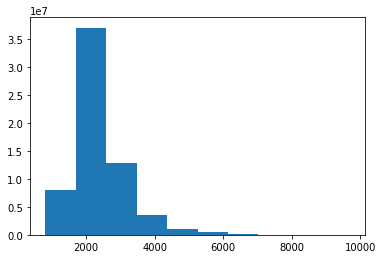

In [6]:
plt.hist(list(result.flatten()))

In [7]:
rmin = result.min()
rmax = result.max()
result2 = (result - rmin)/(rmax - rmin)

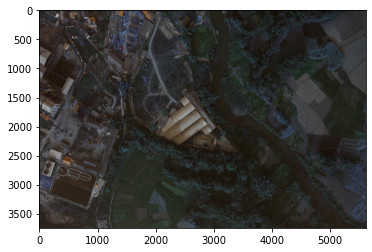

In [8]:
plt.imshow(result2)

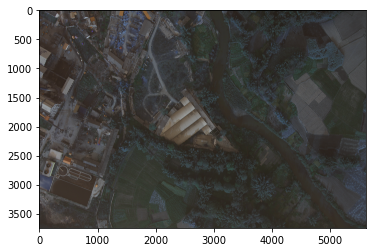

In [44]:
plt.imshow(img)